<a href="https://colab.research.google.com/github/ommnnitald/DiamondPricePrediction/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# !unzip "drive/MyDrive/Dog Breed /dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Breed"

In [ ]:
import tensorflow as tf
print("TF version", tf.__version__)

TF version 2.8.2


In [ ]:
import tensorflow_hub as hub

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
hub.__version__

'0.12.0'

In [ ]:
# /content/drive/MyDrive/Dog Breed/labels.csv
labels_csv = pd.read_csv("drive/MyDrive/Dog Breed/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

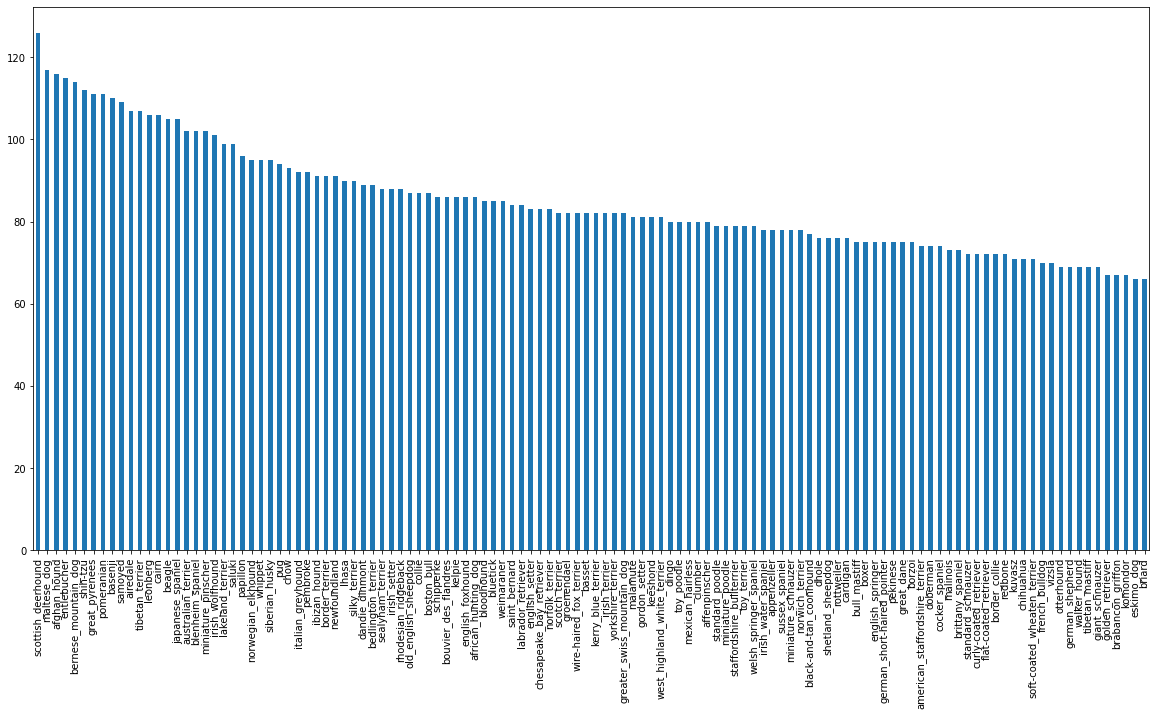

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().mean()

85.18333333333334

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

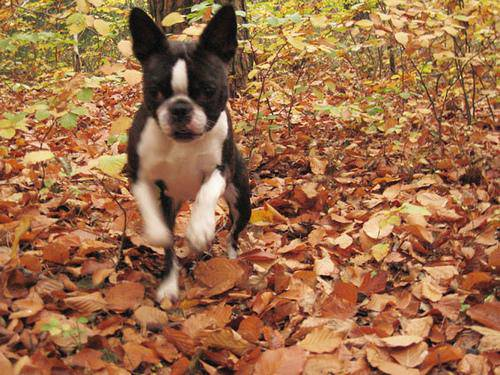

In [ ]:
# let's view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
# getting image and their labels
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
filename = ["drive/MyDrive/Dog Breed/train/" +fname + '.jpg' for fname in labels_csv['id']]
filename

['drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog Breed/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog Breed/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/Dog Breed/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/Dog Breed/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 'driv

In [ ]:
# check whether no. of file name matches no.of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Breed/train/")) == len(filename):
  print("matches")
else:
  print("do not match")

matches


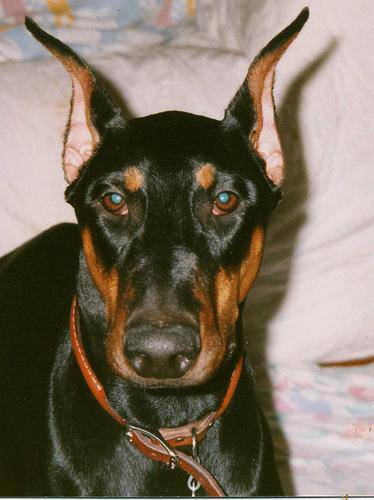

In [ ]:
Image(filename[9001])

In [ ]:
labels_csv["breed"][9001]

'doberman'

In [ ]:
# turning data into labels

In [ ]:
labels =labels_csv["breed"]
labels =np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if no. of labels matches the no. of filename
if len(labels) == len(filename):
  print("matches")
else:
  print("do not match")

matches


In [ ]:

unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [ ]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# turn a single label into an array of boolean
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# turn every label into a boolean array
boolean_labels= [label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# turning boolean array into integers
print(labels[0]) # oroginal label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filename[:10]

['drive/MyDrive/Dog Breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# creating validation set

In [ ]:
X = filename
y= boolean_labels

NameError: ignored

In [ ]:
len(filename)

10222

In [ ]:
# we r going to start off experimenting with 1000 images initially

In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000,max:10000,step:10}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=.2)
len(X_train), len(y_train), len(X_val), len(y_val)

NameError: ignored

In [ ]:
# lets see training data
X_train[:5],y_train[:2]

(['drive/MyDrive/Dog Breed/train/092220a7a8081144a7485efb6c087fe2.jpg',
  'drive/MyDrive/Dog Breed/train/09d7cc03f9e9730bda53b4a590351838.jpg',
  'drive/MyDrive/Dog Breed/train/029202b0cf0b5d6d48c6ce7b432409ef.jpg',
  'drive/MyDrive/Dog Breed/train/0a1b0b7df2918d543347050ad8b16051.jpg',
  'drive/MyDrive/Dog Breed/train/088cdda83ef0920d130398f7724b391f.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

In [ ]:
# preprocessing images(turning images into tensors)

In [ ]:
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# define image size
IMG_SIZE = 224
# create a function preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 colour channel (R,G,B)
  image = tf.image.decode_jpeg(image,channels=3)
  # convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # resize the image to our desired value(224,224)
  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image




In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_image(X[42]), tf.constant(y[42]))

NameError: ignored

In [ ]:
tensor = tf.io.read_file(filename[26])
tensor

NameError: ignored

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

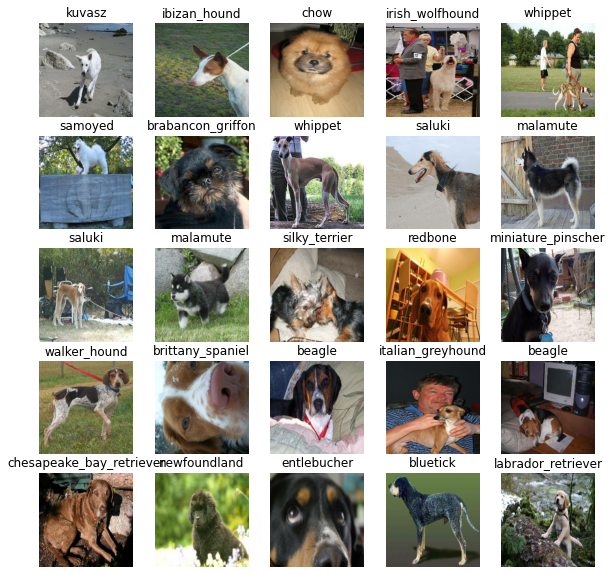

In [ ]:
show_25_images(train_images,train_labels)

In [ ]:
# Building the model

In [ ]:
 INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3]
 OUTPUT_SHAPE = len(unique_breeds)



In [ ]:
IMG_SIZE

224

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

NameError: ignored

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# creating a call backs
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Breed/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# early stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [ ]:
## training the model (on a subset of data)
# initially only 1000 image
NUM_EPOCHS = 17 #@param {type:"slider",min:10,max:100}

In [ ]:
print("GPU", "available (YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available (YESSS!!!!!!)


In [ ]:
 # Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [ ]:
model=train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/16
25/25 [==============================] - 15s 181ms/step - loss: 4.6035 - accuracy: 0.1025 - val_loss: 3.2158 - val_accuracy: 0.2700
Epoch 2/16
25/25 [==============================] - 4s 142ms/step - loss: 1.6336 - accuracy: 0.6938 - val_loss: 2.0097 - val_accuracy: 0.5000
Epoch 3/16
25/25 [==============================] - 4s 167ms/step - loss: 0.5721 - accuracy: 0.9225 - val_loss: 1.5754 - val_accuracy: 0.5750
Epoch 4/16
25/25 [==============================] - 4s 141ms/step - loss: 0.2460 - accuracy: 0.9912 - val_loss: 1.4090 - val_accuracy: 0.6150
Epoch 5/16
25/25 [==============================] - 4s 166ms/step - loss: 0.1430 - accuracy: 0.9975 - val_loss: 1.3336 - val_accuracy: 0.6350
Epoch 6/16
25/25 [==============================] - 4s 145ms/step - loss: 0.0988 - accuracy: 0.9987 - val_loss: 1.2890 - val_accuracy: 0.6350
Epoch 7/16
25/25 [==============================] - 4s

In [ ]:
%tensorboard --logdir drive/My\Drive/Dog\ Breed/logs

<IPython.core.display.Javascript object>

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 119ms/step


array([[9.58504097e-05, 5.58032007e-05, 2.41119857e-03, ...,
        1.02037529e-03, 1.44750637e-03, 4.70726882e-05],
       [6.95733543e-05, 2.69442371e-05, 1.18879572e-04, ...,
        9.80858022e-05, 1.18027544e-02, 1.28558968e-04],
       [1.12939756e-06, 2.12391251e-06, 1.11141571e-05, ...,
        1.93015111e-07, 1.98242880e-04, 4.52597997e-05],
       ...,
       [7.48051843e-06, 1.84207119e-03, 2.02730385e-04, ...,
        5.86764982e-05, 1.60468233e-04, 1.38123200e-04],
       [8.98981398e-06, 4.26977873e-03, 5.22271766e-05, ...,
        8.86576818e-05, 9.87441890e-05, 1.15170835e-04],
       [3.93468799e-05, 7.49738421e-04, 8.53765159e-05, ...,
        4.49167383e-05, 1.18511898e-05, 2.89413838e-05]], dtype=float32)

In [ ]:
predictions[0]

array([9.58504097e-05, 5.58032007e-05, 2.41119857e-03, 2.07887439e-04,
       1.15878829e-04, 8.50223150e-05, 2.95983191e-04, 1.57096032e-02,
       7.06315623e-04, 1.92768057e-04, 7.67621241e-05, 1.15267008e-04,
       1.78645001e-04, 2.14210959e-04, 1.93990403e-04, 3.16502155e-05,
       6.57268538e-05, 1.53047182e-02, 3.97146068e-04, 8.49789474e-04,
       1.05864667e-04, 9.70197259e-04, 4.24210302e-05, 2.08145648e-05,
       6.82254831e-05, 1.00138562e-03, 9.04141692e-04, 3.21588159e-04,
       3.26460140e-04, 4.71265893e-03, 8.38134787e-04, 1.20062068e-05,
       2.30157166e-04, 3.56539502e-04, 1.27755149e-04, 6.58682897e-04,
       2.48695314e-02, 8.56956184e-01, 1.31597641e-04, 2.94467038e-03,
       5.72319477e-05, 6.56675502e-06, 3.91386347e-05, 2.77751766e-04,
       5.10193495e-05, 4.26140177e-04, 2.31313068e-04, 2.44975436e-05,
       9.13449912e-04, 6.77414704e-03, 2.44969968e-04, 3.67863424e-04,
       2.23845927e-04, 3.05902722e-06, 2.62826565e-03, 3.87666078e-04,
      

In [ ]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[3.74804775e-04 4.50333755e-05 1.69115537e-03 3.31536838e-04
 3.20267864e-04 1.50049001e-03 4.43276105e-04 3.38828540e-03
 2.89247429e-04 4.72029897e-05 5.43910428e-04 9.62628765e-05
 5.34177991e-04 1.26591884e-04 1.43993471e-03 2.11543273e-04
 5.66414266e-04 4.20882786e-03 6.45412714e-04 2.67253577e-04
 1.98114169e-04 1.53713700e-04 3.98831500e-04 3.78251789e-05
 1.39707729e-04 1.54218797e-04 1.03918064e-04 1.15589384e-04
 3.95880837e-04 1.50983687e-03 3.25051160e-03 2.44000257e-05
 9.01590101e-05 1.21812736e-04 4.37905182e-05 2.48523778e-04
 1.97390467e-01 7.07888305e-01 4.37767623e-04 1.25835033e-03
 5.69734730e-05 9.19472295e-05 3.26485257e-03 1.06007392e-04
 1.88904523e-04 1.04022771e-03 5.74645819e-04 2.56492989e-04
 1.26118684e-04 5.67332259e-04 1.37072071e-04 4.12406749e-04
 1.01771540e-04 6.92840957e-04 7.35099951e-04 1.13286159e-03
 4.06773016e-03 1.53579540e-03 8.52538564e-04 9.95390510e-05
 3.72077455e-03 1.06995940e-04 3.78227960e-05 7.00789038e-03
 1.05127765e-04 3.144454

In [ ]:
unique_breeds[113]

'walker_hound'

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[81])
pred_label

'norwich_terrier'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.59356296, 0.63782996, 0.4646857 ],
         [0.46236545, 0.4911683 , 0.32769114],
         [0.7694853 , 0.7663723 , 0.63184804],
         ...,
         [0.3821631 , 0.46802896, 0.34633777],
         [0.5426044 , 0.636722  , 0.51123184],
         [0.3433479 , 0.43746555, 0.31197533]],
 
        [[0.46728376, 0.4664686 , 0.3451199 ],
         [0.94198674, 0.94374347, 0.83114284],
         [0.8463756 , 0.8438141 , 0.736506  ],
         ...,
         [0.37015224, 0.4680678 , 0.34649917],
         [0.5004377 , 0.60512954, 0.4841562 ],
         [0.3238063 , 0.42849815, 0.30752477]],
 
        [[0.49660417, 0.44245502, 0.39242274],
         [0.24588698, 0.20829177, 0.14452195],
         [0.9212405 , 0.9062342 , 0.8371089 ],
         ...,
         [0.27719438, 0.38998818, 0.2666825 ],
         [0.45835197, 0.588394  , 0.4671405 ],
         [0.5449887 , 0.669516  , 0.5484841 ]],
 
        ...,
 
        [[0.15256374, 0.16477156, 0.19921389],
         [0.17040162, 0.17253035, 0.20398

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

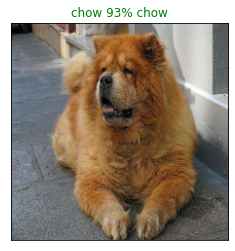

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

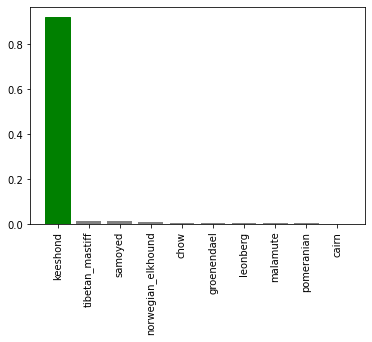

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

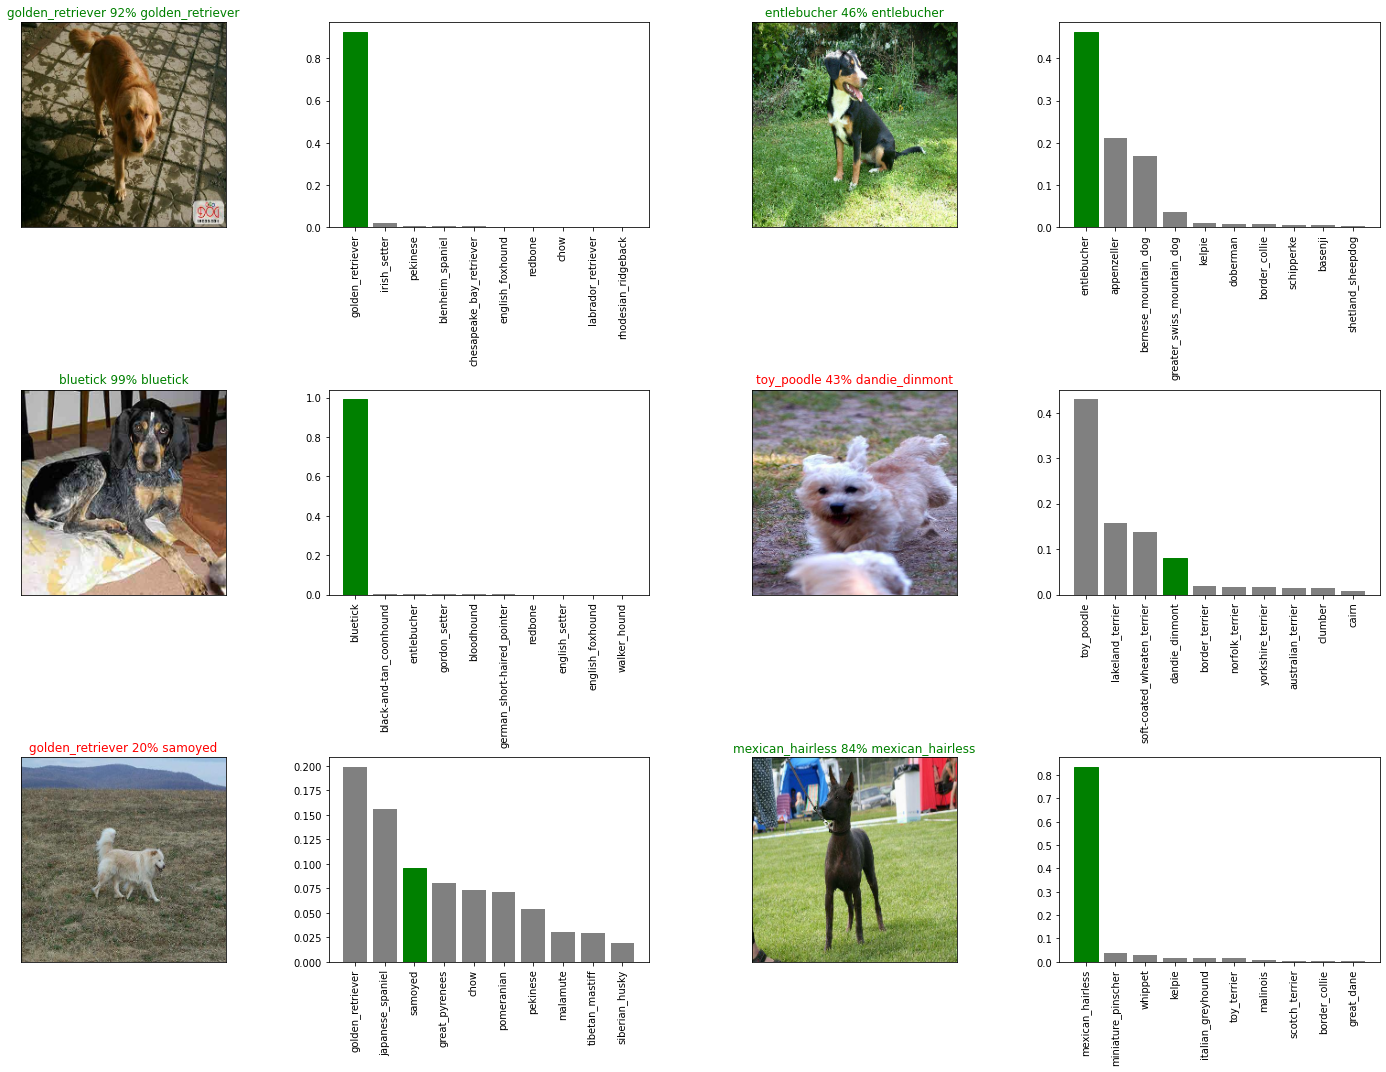

In [ ]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Breed/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Breed/models/20220908-09401662630016-1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Breed/models/20220908-09401662630016-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_image_model = load_model('drive/MyDrive/Dog Breed/models/20220908-09111662628312-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Breed/models/20220908-09111662628312-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 79ms/step - loss: 1.1515 - accuracy: 0.6550


[1.1514843702316284, 0.6549999713897705]

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/16
320/320 [==============================] - 43s 122ms/step - loss: 1.3465 - accuracy: 0.6713
Epoch 2/16
320/320 [==============================] - 40s 124ms/step - loss: 0.4032 - accuracy: 0.8804
Epoch 3/16
320/320 [==============================] - 40s 126ms/step - loss: 0.2386 - accuracy: 0.9352
Epoch 4/16
320/320 [==============================] - 34s 105ms/step - loss: 0.1541 - accuracy: 0.9635
Epoch 5/16
320/320 [==============================] - 34s 107ms/step - loss: 0.1054 - accuracy: 0.9786
Epoch 6/16
320/320 [==============================] - 35s 108ms/step - loss: 0.0755 - accuracy: 0.9869
Epoch 7/16
320/320 [==============================] - 35s 110ms/step - loss: 0.0595 - accuracy: 0.9906
Epoch 8/16
320/320 [==============================] - 35s 108ms/step - loss: 0.0469 - accuracy: 0.9943
Epoch 9/16
320/320 [==============================] - 38s 117ms/step - loss: 0.0379 - accuracy: 0.9956
Epoch 10/16
320/320 [==============================] - 34s 107ms/step - l

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to: drive/MyDrive/Dog Breed/models/20220908-09501662630651-full-image-set-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Breed/models/20220908-09501662630651-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model('drive/MyDrive/Dog Breed/models/20220908-09291662629362-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/MyDrive/Dog Breed/models/20220908-09291662629362-full-image-set-mobilenetv2-Adam.h5


In [ ]:
# Load test image filenames
test_path = "drive/MyDrive/Dog Breed/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

NameError: ignored

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/Dog Breed/dog-vision-prediction-probabilites-array.csv", delimiter=",")
test_predictions[:10]

NameError: ignored

In [ ]:
test_predictions.shape

(10357, 120)

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e57fded38af2f081403feefb324ed3a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e1ada9b155a5903bc6475255d012f681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e519e383a6efec0abd285beda04aeac9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,dfdeddf3da8d52c211620eaabd82b773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e2a9a7580a1424bc6531b2b7375338db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e57fded38af2f081403feefb324ed3a9,1.611965e-09,3.440864e-12,2.328344e-11,1.407994e-12,5.980330e-09,2.145339e-11,5.328517e-10,1.764934e-10,4.491057e-11,...,8.200658e-09,4.056766e-08,2.202154e-11,3.074556e-12,7.080598e-12,3.024534e-09,2.991727e-07,1.069177e-13,1.585305e-08,1.521617e-06
1,e1ada9b155a5903bc6475255d012f681,3.178943e-10,3.200883e-14,1.853748e-10,1.954662e-13,8.682216e-07,3.362278e-07,2.264711e-06,9.995926e-01,1.876677e-10,...,3.441671e-07,1.129437e-04,6.675200e-09,1.690707e-06,6.804413e-10,5.923428e-09,5.574148e-09,7.005888e-08,1.888222e-08,2.569809e-10
2,e519e383a6efec0abd285beda04aeac9,4.273011e-09,1.841395e-13,1.117849e-09,1.106639e-10,7.225005e-11,1.169239e-05,7.223256e-07,5.553372e-04,9.785655e-11,...,3.530463e-09,4.605002e-05,9.586189e-12,2.740325e-08,8.798643e-12,2.793681e-08,1.502214e-07,2.719492e-12,2.239271e-06,7.418608e-11
3,dfdeddf3da8d52c211620eaabd82b773,5.227723e-14,3.371553e-14,1.638175e-11,5.283554e-12,7.160043e-08,1.832600e-13,6.625124e-13,1.087913e-13,8.482403e-11,...,5.968796e-12,1.492889e-13,2.230498e-06,4.158368e-10,9.999646e-01,3.224581e-13,1.426521e-11,2.974644e-12,8.130380e-13,6.134530e-11
4,e2a9a7580a1424bc6531b2b7375338db,9.613753e-11,1.304277e-08,1.246931e-08,1.478856e-07,6.658420e-09,6.374474e-12,2.422878e-05,4.128350e-09,1.767556e-04,...,1.207746e-06,2.052871e-08,6.508744e-13,2.080402e-10,1.428936e-09,5.703394e-08,1.541623e-06,2.052792e-05,3.110282e-04,1.318874e-06


In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/Dog Breed/Dog Photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
# Save our predictions dataframe to CSV for submission to Kaggle
preds_df.to_csv("drive/MyDrive/Dog Breed/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

In [ ]:
custom_image_paths

['drive/MyDrive/Dog Breed/Dog Photos/Pomeranian.JPG',
 'drive/MyDrive/Dog Breed/Dog Photos/iStock-1223511966-1024x711.jpg',
 'drive/MyDrive/Dog Breed/Dog Photos/breed_profile_germansheperd_1118000_profile_2608-d7a78e7c1cf049879bec1ec19113ee42.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['pomeranian', 'doberman', 'german_shepherd']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

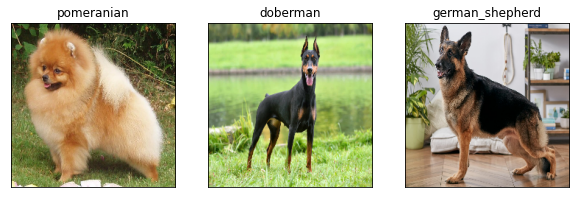

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)